# Multiple Servers & Single Queue
## Members:
### Mahdi Mohammadi 9825041
### Pedram Peiro Asfia 9825006

# Library

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Defining Variables (for statistics)

In [2]:
lis_MWT=[]       #list for mean of waiting times for different number of servers
lis_MRET=[]      #list for total number of returned customers for different number of servers
lis_SVR=[]       #list for total engagement of each server for different number of servers
lis_obj=[]       #list for the value of objective function for different number of servers
lis_SVR_total=[] #list for total engagement of each server for different number of servers

# Main Code

In [3]:
# np.random.seed(0)
for I in range(1,21):
    
    '''
       Definition of codes:
       code = 0: Arrival
       code= 1,2,...,I: Departure from ith server
    '''
    TWT = 0                   #total waiting time
    N = 0                     #number of arrival customers (that might have not been given service)
    MTOT = 0                  #number of customers that have been given service
    Status = np.zeros(I)      #status of i'th server (busy=1 , idle=0)
    FEL = [(0, 0)]            #(code , time)
    FEL_backup = []           #backup of FEL (saves every event)
    Q = 0                     #number of people waiting in queue
    C = 6                     #capacity of queue
    SVR = np.zeros(I)         #duration of being busy for server i
    MRET = 0                  #number of people returned
    Tnow = 0
    T = 7 * 60                #duration of simulation
    ArrivalTime = []          #arrival time to "Queue" for customers (ID of customer , ArrivalTime)
    
  
    #MAIN CODE

    while (Tnow <= T) or (len(FEL)!=0):

        FEL_backup.extend(FEL)        #saving every event

        #arrival event  
        if FEL[0][0]==0:
            N+=1
            InterArrival = np.random.randint(6)+1

            if Tnow+InterArrival <=T :
                FEL.append((0 , Tnow+InterArrival))

            if Q<C:
                MTOT+=1
                for i in range(I):
                    if Status[i]==0:
                        Status[i]=1
                        ST = np.random.randint(11)+11
                        SVR[i]+=ST
                        FEL.append((i+1 , Tnow+ST))
                        break

                    elif i==I-1:
                        Q+=1
                        ArrivalTime.append((MTOT , Tnow))
                        break
            else: MRET+=1


        #departure event
        else:
            if Q==0:
                Status[FEL[0][0]-1]=0            # server i (or FEL[0][0]) is idle now

            else:     #(Q!=0)
                Q-=1            
                WT = Tnow - ArrivalTime[0][1]
                ArrivalTime.pop(0)               #removing the person who is being given service from ArrivalTime
                TWT+=WT

                ST = np.random.randint(11)+11
                SVR[FEL[0][0]-1]+=ST
                FEL.append((FEL[0][0] , Tnow+ST))

        FEL.pop(0)
        FEL.sort(key=lambda x: x[1])
        if len(FEL)!=0: Tnow=FEL[0][1]           #updating Tnow

        #end of while loop
        
        
    FEL_backup = list(set(FEL_backup))
    FEL_backup.sort(key=lambda x: x[1]) #sorting all the events chronologically

    # variables for objective function
    MWT = TWT/N*100    #Mean Waiting Time
    per_MRET = MRET/N*100    #it is not a statistic (MRET is) but we use this as a value for our objective function
    per_SVR = np.mean(SVR)/Tnow*100  #it is not a statistic (SVR/Tnow ot SVR/T is) but we use this as a value for our objective function

    # Calculating obj function
    obj_function = 1*MWT+1.5*per_MRET-1*per_SVR
    
    lis_MWT.append(MWT)
    lis_MRET.append(MRET)
    lis_SVR.append(SVR/T*100)
    lis_SVR_total.append(SVR/Tnow*100)
    lis_obj.append(obj_function)

# Plotting the results of MRET

<IPython.core.display.Javascript object>


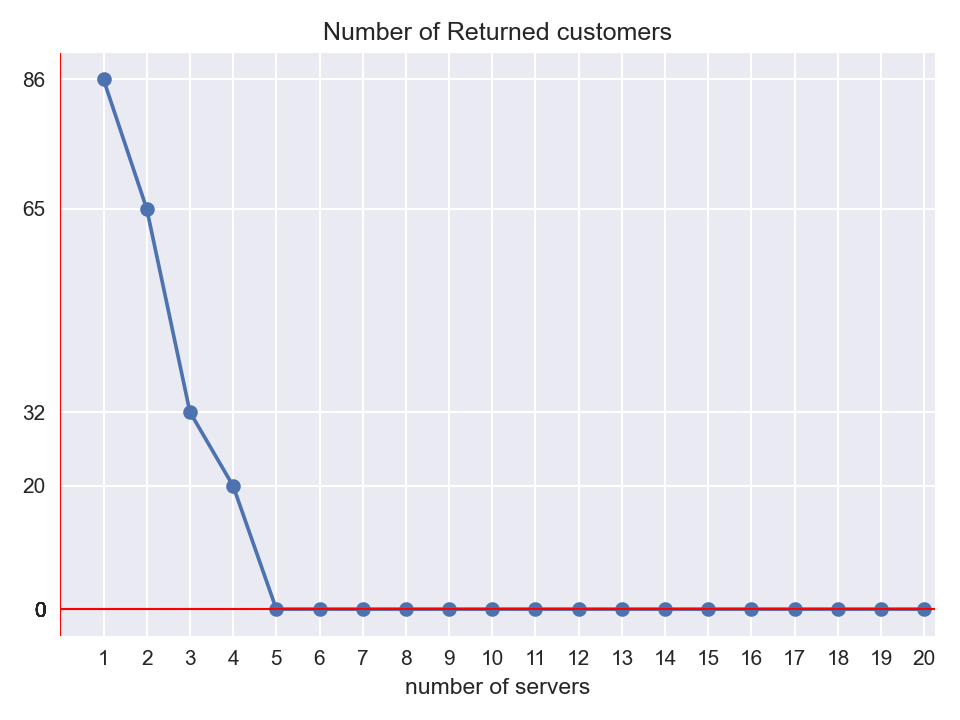

In [4]:
plt.figure()
plt.style.use('seaborn')
plt.plot(np.arange(1,21) ,lis_MRET , marker='o' )
plt.title('Number of Returned customers')
plt.xlabel('number of servers')
plt.xticks(np.arange(1, 21, 1))
plt.yticks(lis_MRET)
plt.xlim([0,20+0.25])
plt.axhline(0, color='red',linewidth=1)
plt.axvline(0, color='red',linewidth=1)
plt.tight_layout()
# plt.savefig('Number of Returned customers.jpg' , dpi=1000)
plt.show()

# Plotting the results of mean of engagement of servers

<IPython.core.display.Javascript object>


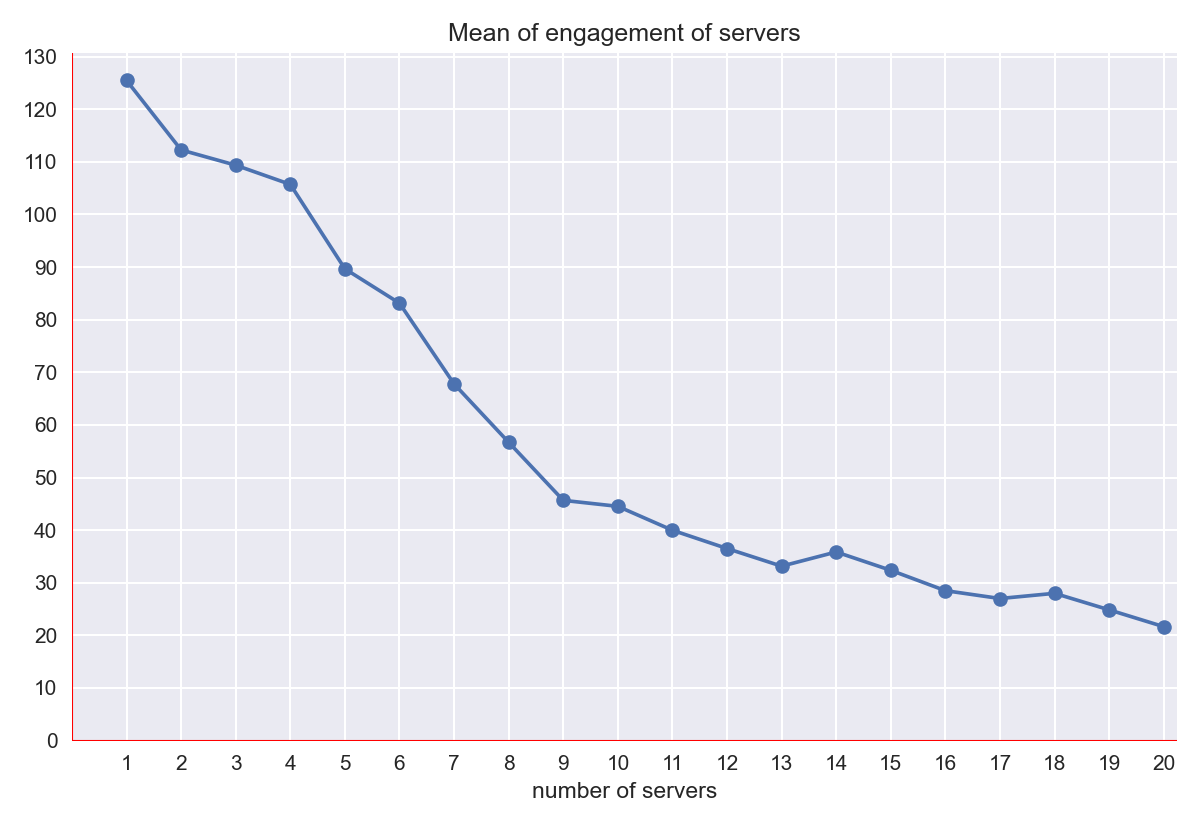

In [5]:
plt.figure()
plt.style.use('seaborn')
plt.plot(np.arange(1,21) ,[np.mean(x) for x in lis_SVR] , marker='o' )
plt.title('Mean of engagement of servers')
plt.xlabel('number of servers')
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0,131,10))
plt.xlim([0,20+0.25])
plt.axhline(0, color='red',linewidth=1)
plt.axvline(0, color='red',linewidth=1)
# plt.savefig('Mean of engagement of servers.jpg' , dpi=1000)
plt.tight_layout()
plt.show()

# Plotting the results of mean of waiting time

<IPython.core.display.Javascript object>


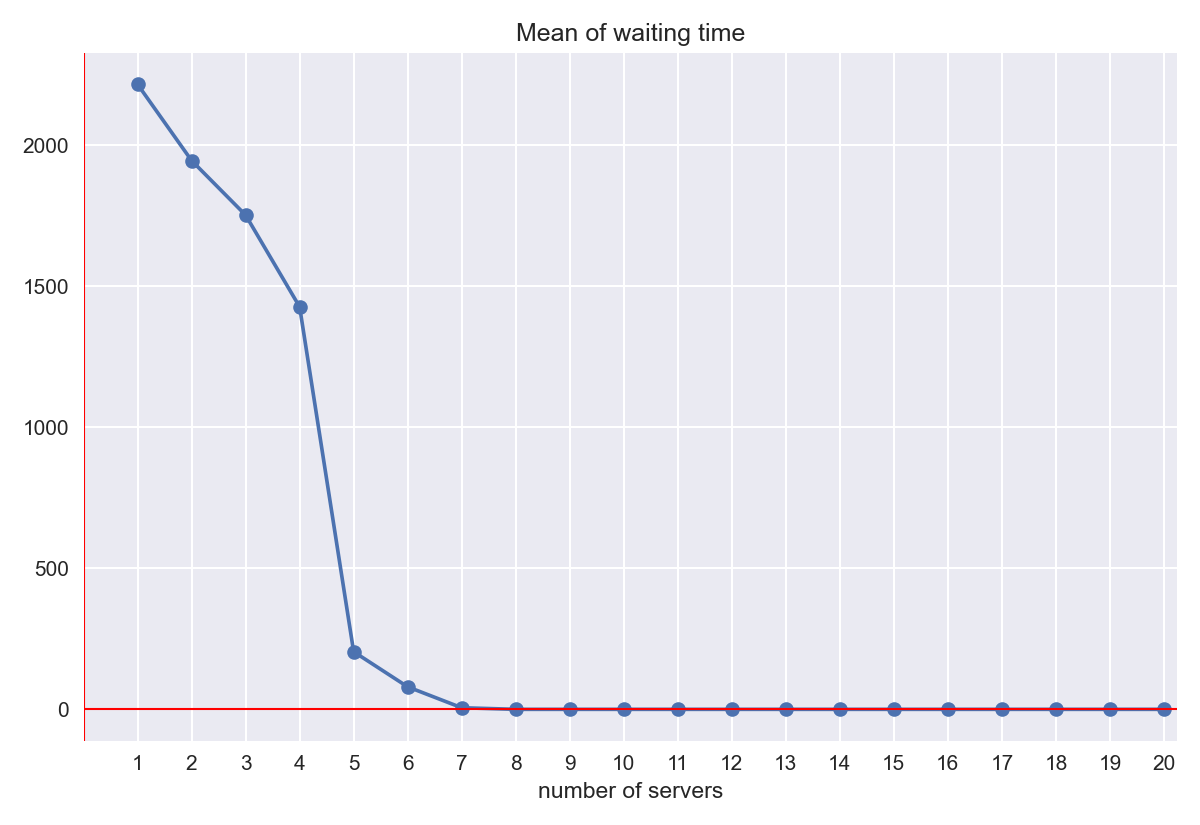

In [6]:
plt.figure()
plt.style.use('seaborn')
plt.plot(np.arange(1,21) ,lis_MWT , marker='o' )
plt.title('Mean of waiting time')
plt.xlabel('number of servers')
plt.xticks(np.arange(1, 21, 1))
plt.xlim([0,20+0.25])
plt.axhline(0, color='red',linewidth=1)
plt.axvline(0, color='red',linewidth=1)
plt.tight_layout()
# plt.savefig('Mean of waiting time.jpg' , dpi=1000)
plt.show()

# Plotting the results of objective function

<IPython.core.display.Javascript object>


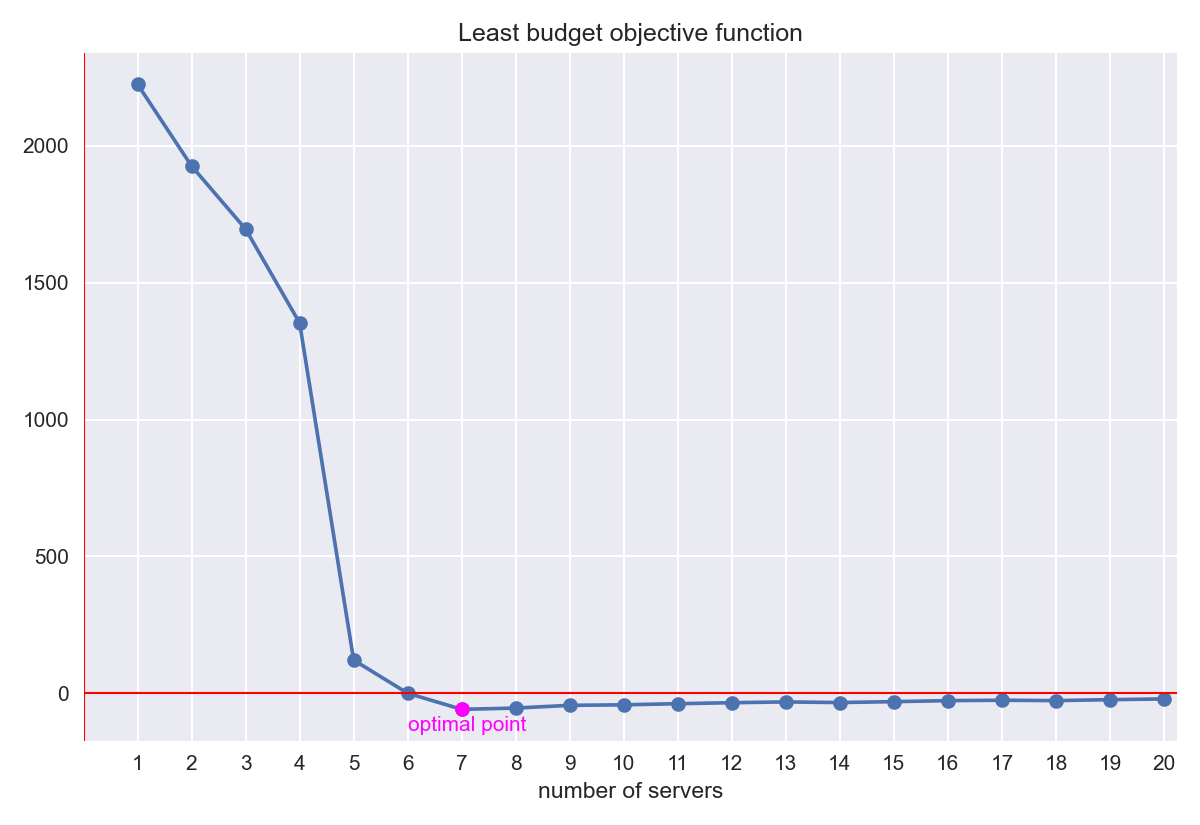

In [7]:
plt.figure()
plt.style.use('seaborn')
plt.plot(np.arange(1,21) ,lis_obj , marker='o' )
plt.plot(np.where(lis_obj==min(lis_obj))[0][0]+1 , min(lis_obj),c='magenta',marker='o')
plt.text(np.where(lis_obj==min(lis_obj))[0][0]+1-1 , min(lis_obj)-80 , s='optimal point',c='magenta')
plt.title('Least budget objective function')
plt.xlabel('number of servers')
plt.xticks(np.arange(1, 21, 1))
plt.xlim([0,20+0.25])
plt.axhline(0, color='red',linewidth=1)
plt.axvline(0, color='red',linewidth=1)
# plt.savefig('Objective function least budjet.jpg' , dpi=1000)
plt.tight_layout()
plt.show()

# Statistics for optimal number of Servers

In [8]:
index= np.where(lis_obj==min(lis_obj))[0][0]
df = pd.DataFrame({'Servers':index+1 ,'Capacity of Queue':C ,'Mean of Waiting Time':lis_MWT[index] , 'Returned Custoemrs':lis_MRET[index],
             'Percentage of Server Engagement (based on Simulation Time)':np.array_str(lis_SVR[index]),
                  'Percentage of Server Engagement (based on Total Time)':np.array_str(lis_SVR_total[index])} , index=[0])
df

,Servers,Capacity of Queue,Mean of Waiting Time,Returned Custoemrs,Percentage of Server Engagement (based on Simulation Time),Percentage of Server Engagement (based on Total Time)
0,7,6,5.645161,0,[94.52380952 87.85714286 82.61904762 80.238095...,[90.43280182 84.0546697 79.04328018 76.765375...
